In [202]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [14]:
df=pd.read_csv('data.csv')
x=df[df.columns[:-1]]
y=df['Y'].values.reshape((10,1))
print(x.isnull().sum())

X1    0
X2    0
dtype: int64


In [15]:
def sigmoid(z):
    output=1/(1+np.exp(-z))
    return output

In [16]:
def derivative_tanh(z):
    derivative=4/(np.exp(z)+np.exp(-z))**2
    return derivative

In [140]:
class NeuralNetwork():
    
    def __init__(self,input_node,node,ouput_node):
        
        #initialising weights for hidden layer 1
        w1=np.random.randn(input_node,node[0])
        b1=np.random.randn(1,node[0])
        
        #initialising weights for output layer
        w2=np.random.randn(node[0],output_node)
        b2=np.random.randn(1,output_node)
        
        self.model={'w1':w1,'b1':b1,'w2':w2,'b2':b2}
        
    def forward_propagation(self,x):
        
        w1,w2=self.model['w1'],self.model['w2']
        b1,b2=self.model['b1'],self.model['b2']
        
        z1=np.dot(x,w1)+b1
        a1=np.tanh(z1)
        
        z2=np.dot(a1,w2)+b2
        a2=sigmoid(z2)
        
        self.activation=[a1,a2]
        self.z=[z1,z2]
        return a2
        
    def backward_propagation(self,x,y,learning_rate=0.1):
        
        w1,w2=self.model['w1'],self.model['w2']
        b1,b2=self.model['b1'],self.model['b2']
        [a1,a2]=self.activation
        [z1,z2]=self.z
        m=y.shape[0]
        
        #slope term means d(a)/d(z). more clearly for a particular hidden layer slope=d(output)/d(input)
        slope2=a2*(1-a2)
        delta2=a2-y
        dw2=np.dot(a1.T,delta2)/m
        db2=np.sum(delta2,axis=0)/m
        
        slope1=derivative_tanh(z1)
        delta1=(np.dot(delta2,w2.T))*slope1
        dw1=np.dot(x.T,delta1)/m
        db1=np.sum(delta1,axis=0)/m
        
        w2-=learning_rate*dw2
        b2-=learning_rate*db2
        w1-=learning_rate*dw1
        b1-=learning_rate*db1
        
        self.model={'w1':w1,'b1':b1,'w2':w2,'b2':b2}

In [189]:
def loss_func(hx,y):
    cost=(-1)*((y*np.log(hx)+(1-y)*np.log(1-hx)).mean())
    return (cost/y.shape[0])

In [190]:
def predict(hx,threshold=0.5):
    return (hx>=threshold)

In [191]:
input_node=2
node=[3]
#node is a list which contains the no of nodes in each hidden layer
output_node=1

In [192]:
nn=NeuralNetwork(input_node,node,output_node)
loss=[]

In [195]:
for i in range(600):
    hx=nn.forward_propagation(x)
    l=loss_func(hx,y)
    loss.append(l)
    nn.backward_propagation(x,y)   

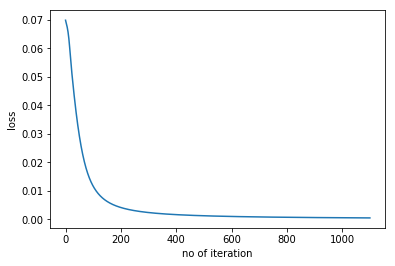

0.000514268971768467


In [196]:
plt.plot(loss)
plt.xlabel('no of iteration')
plt.ylabel('loss')
plt.show()
print(loss[-1])

In [210]:
y_pred=predict(hx)
print(cm)
print("ACCURACY :",((cm[0][0]+cm[1][1])/np.sum(cm))*100," %" )

[[5 0]
 [0 5]]
ACCURACY : 100.0  %
